**Importing the Dependencies**

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [ ]:
#Importing the Boston House Price Data.
hpd = sklearn.datasets.load_boston()

In [ ]:
print(hpd)

In [26]:
# Importing the data into a Pandas Data Frame.
df = pd.DataFrame(hpd.data,columns=hpd.feature_names)

In [27]:
# Printing the first five rows.
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [43]:
df['PRICE']=hpd.target

In [44]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [45]:
# Checking for Missing Values.
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [50]:
# Checking for duplicates.
df.duplicated().sum()

0

In [51]:
# Statistical Description of the data set.
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**Understading the correlations between the features in the dataset.**

In [54]:
# Getting the correlation matrix
cors = df.corr()
print(cors.to_string())

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE       DIS       RAD       TAX   PTRATIO         B     LSTAT     PRICE
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734 -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537  0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779 -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518 -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470 -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265  0.205246 -0.209847 -0.292048 -0.3

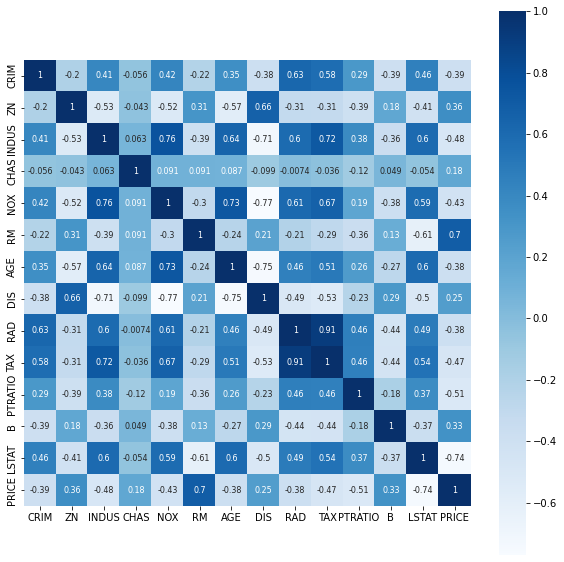

In [59]:
# Connstructing a heat map to understand the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(cors,cbar=True,square=True,annot=True,annot_kws={'size':8},cmap='Blues')

***Splitting the data and the target***

In [ ]:
X = df.drop(['PRICE'],axis=1)
Y = df['PRICE']
print("DATA VALUES\n",X)
print("\n\nTARGETS\n",Y)

***Splitting the data into training data and testing data.***

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [66]:
print(X.shape, X_train.shape, X_test.shape)

(506, 13) (404, 13) (102, 13)


***Model Training***

XG BOOST REGRESSOR

In [70]:
# Loading the model
model = XGBRegressor()

In [72]:
# Training the model with X_train
model.fit(X_train, Y_train)

[11:26:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

***Evaluation***

***Prediction on training data***

In [73]:
# Accuracy for prediction o training data
training_data_prediction = model.predict(X_train) 
print(training_data_prediction)

[23.360205  22.462858  20.84804   33.77895   15.333282  13.616525
 21.71274   15.175322  11.724756  21.836252  16.08508    7.52517
 31.094206  48.56228   32.623158  20.546066  22.177324  20.500404
 31.666502  20.551508  25.74269    8.247894  45.200817  22.069397
 20.698004  20.100042  19.873472  26.242834  23.39618   31.927258
 21.493471   9.280926  18.504272  21.87202   12.504413  10.578829
 13.054951  23.541336  19.164755  15.888303  23.768887  28.454714
 15.539753  18.049202  16.23671   14.08383   25.33273   17.575668
 49.566467  16.990675  21.738977  32.935143  16.125738  22.45393
 20.776966  20.042227  22.898897  38.124043  30.607079  32.607468
 20.919416  47.348038  14.524615   8.126455  19.581661   9.030508
 26.462107  17.69918   20.546162  46.312218  39.689137  34.387108
 22.11083   34.568977  24.873934  50.078335  14.5669775 20.525211
 20.62971   23.202105  49.514477  23.12061   24.795782  20.319666
 43.869396  17.110266  32.165016  34.75202    7.313497  20.309446
 18.038298  

In [74]:
# Error Testing for Training Data 

#  R Squared Error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print("R Squared Error:   ", score_1)
print("Mean Absolute Error:   ", score_2)

R Squared Error:    0.9733349094832763
Mean Absolute Error:    1.145314053261634


***Visualising the Actual Values and the Predicted Values.***

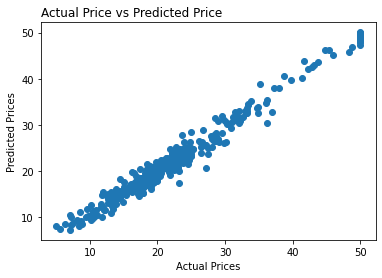

In [78]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price",loc = 'left')
plt.show()

In [76]:
# Accuracy for prediction o testing data
testing_data_prediction = model.predict(X_test) 
print(testing_data_prediction)

[19.862686  20.875359  33.17797   27.382437   8.670393  12.749035
 24.892832  28.360075  24.255108  21.072632  26.47432   23.733467
 19.937876  20.904943  11.981489  21.96157   18.912077  11.756731
  7.6664963 15.348703  22.421118  20.452726  35.121113  18.995922
 14.649773  19.7423    46.987373  31.679413  33.486717  19.149603
 16.978365  19.986921  29.671926  25.908306  12.054155  19.783747
 11.48538   20.736174  21.28781   22.159164  24.212786  14.06105
 31.836473   8.498605  19.9131    15.15852   34.853638  16.41293
 32.33093   11.683373  29.010166  27.483522   7.4060163 36.29048
 26.685335  19.16574   18.62919   18.594267  15.957146  20.692377
 18.621147  20.87898   18.639454  31.751453  34.53461   24.462927
 48.532074  25.695988  11.561405  22.441519  13.844913   8.819357
 18.711916  17.386942  25.362583  24.995708  21.686417  21.840801
 20.210482  23.037663  34.230244  17.989033  19.622482  29.318424
 47.41502   34.988304  18.88605   23.692265  29.01938   19.878334
 20.244999  1

In [77]:
# Error Testing for Testing Data 

#  R Squared Error
score_1 = metrics.r2_score(Y_test, testing_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, testing_data_prediction)

print("R Squared Error:   ", score_1)
print("Mean Absolute Error:   ", score_2)

R Squared Error:    0.9115937697657654
Mean Absolute Error:    1.9922956859364223


***Visualising the Actual Values and the Predicted Values.***

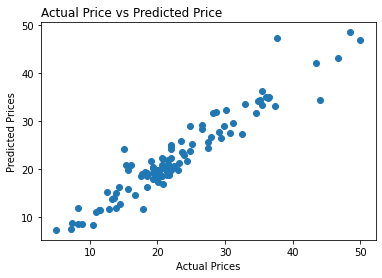

In [79]:
plt.scatter(Y_test, testing_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price",loc = 'left')
plt.show()